In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
years = range(2006, 2024)

li = []
for year in years:
    df = pd.read_csv(f"../data/dam/OASIS_Day-Ahead_Market_Zonal_LBMP_{year}.csv")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame['Eastern Date Hour Time Zone'].unique()

array(['EST', 'EDT'], dtype=object)

In [4]:
frame['Date'] = pd.to_datetime(frame['Eastern Date Hour'])

In [5]:
frame.head()

,Eastern Date Hour,Eastern Date Hour Time Zone,Zone Name,Zone PTID,DAM Zonal LBMP,DAM Zonal Losses,DAM Zonal Congestion,DAM Zonal Price Version,Date
0,2006/01/01 00:00:00,EST,CAPITL,61757,54.72,2.75,0.00,1,2006-01-01
1,2006/01/01 00:00:00,EST,CENTRL,61754,49.83,-2.13,0.00,1,2006-01-01
2,2006/01/01 00:00:00,EST,DUNWOD,61760,55.60,3.64,0.00,1,2006-01-01
3,2006/01/01 00:00:00,EST,GENESE,61753,47.86,-4.11,0.00,1,2006-01-01
4,2006/01/01 00:00:00,EST,H Q,61844,54.42,-0.10,-2.56,1,2006-01-01


In [6]:
prices_est = frame[frame['Eastern Date Hour Time Zone'] == 'EST']
prices_est = prices_est.pivot(index = 'Date', columns = 'Zone Name', values = 'DAM Zonal LBMP')

prices_edt = frame[frame['Eastern Date Hour Time Zone'] == 'EDT']
prices_edt = prices_edt.pivot(index = 'Date', columns = 'Zone Name', values = 'DAM Zonal LBMP')

In [7]:
prices = pd.concat([prices_est, prices_edt], axis=0)

In [8]:
prices.head()

Zone Name,CAPITL,CENTRL,DUNWOD,GENESE,H Q,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,NPX,O H,PJM,WEST
Date,,,,,,,,,,,,,,,
2006-01-01 00:00:00,54.72,49.83,55.60,47.86,54.42,55.18,88.07,51.96,55.44,56.07,51.70,54.77,45.00,46.66,45.47
2006-01-01 01:00:00,48.07,43.92,48.90,42.31,46.18,48.62,85.96,45.90,48.80,49.31,46.09,48.25,39.50,40.42,39.78
2006-01-01 02:00:00,45.91,41.87,46.48,40.51,48.44,46.22,81.96,43.72,46.44,46.88,43.94,46.00,38.01,38.45,38.19
2006-01-01 03:00:00,45.81,41.78,46.33,40.43,47.51,46.07,81.15,43.58,46.25,46.73,43.80,45.90,38.02,38.72,38.24
2006-01-01 04:00:00,44.87,41.10,45.30,39.81,47.54,45.00,81.24,42.73,45.21,45.69,42.94,44.91,37.54,38.48,37.75


In [9]:
monthly = prices.resample('M').mean()

Text(0.5, 1.0, 'Monthly day-ahead prices in the NYISO and neighbouring balancing zones in $/MWh')

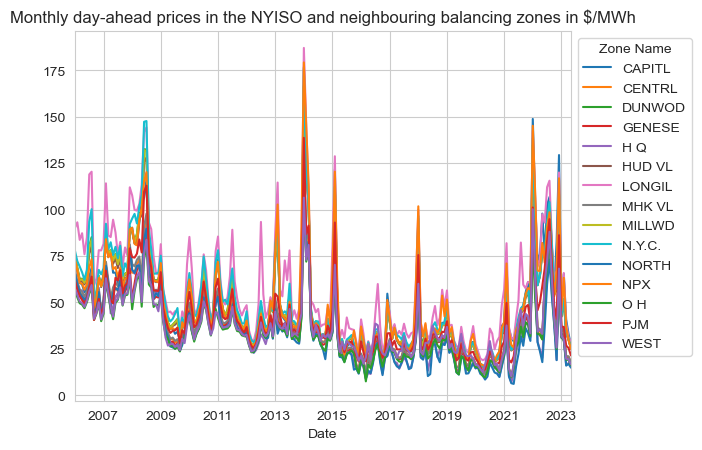

In [10]:
ax = monthly.plot()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Monthly day-ahead prices in the NYISO and neighbouring balancing zones in $/MWh")

In [11]:
monthly.columns

Index(['CAPITL', 'CENTRL', 'DUNWOD', 'GENESE', 'H Q', 'HUD VL', 'LONGIL',
       'MHK VL', 'MILLWD', 'N.Y.C.', 'NORTH', 'NPX', 'O H', 'PJM', 'WEST'],
      dtype='object', name='Zone Name')

In [16]:
localities = pd.DataFrame()
localities['NYCA'] = monthly[['CAPITL', 'CENTRL', 'DUNWOD', 'GENESE', 'WEST', 'HUD VL', 'LONGIL',
       'MHK VL', 'MILLWD', 'N.Y.C.', 'NORTH']].mean(axis = 1)
localities['NYC'] = monthly['N.Y.C.']
localities['LI'] = monthly['LONGIL']
localities['G-J'] = monthly[['HUD VL', 'MILLWD', 'DUNWOD', 'N.Y.C.']].mean(axis = 1)

In [21]:
localities.head()

,NYCA,NYC,LI,G-J
Date,,,,
2006-01-31,71.063608,77.892083,90.131169,75.150094
2006-02-28,66.316258,72.224866,93.183423,69.285882
2006-03-31,61.063118,69.330995,83.718024,63.911855
2006-04-30,60.440474,66.244896,87.301433,63.217510
2006-05-31,57.136391,62.234140,75.975242,60.800796


Text(0.5, 1.0, 'Monthly average day-ahead prices per locality in $/MWh')

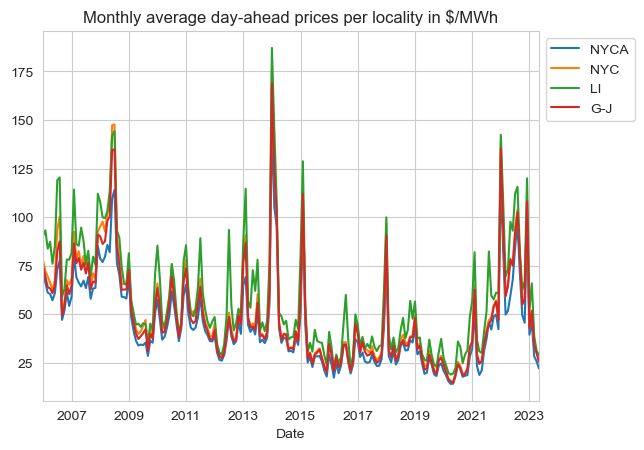

In [17]:
ax = localities.plot()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Monthly average day-ahead prices per locality in $/MWh")

In [63]:
fuels = pd.read_csv('../data/fuels/fuels.csv')
fuels = fuels.set_index(pd.to_datetime(fuels['Date'], dayfirst=True))
fuels.head()

,Date,United States : coal dollars per million Btu,United States : bituminous coal dollars per million Btu,United States : subbituminous coal dollars per million Btu,United States : lignite coal dollars per million Btu,United States : petroleum liquids dollars per million Btu,United States : petroleum coke dollars per million Btu,United States : natural gas dollars per million Btu
Date,,,,,,,,
2008-01-01,01/01/2008,1.88,2.2,1.55,1.33,14.61,1.62,8.19
2008-02-01,01/02/2008,1.89,2.22,1.55,1.37,15.03,1.82,8.58
2008-03-01,01/03/2008,1.93,2.25,1.57,1.38,14.67,1.82,9.25
2008-04-01,01/04/2008,1.97,2.33,1.57,1.42,14.65,1.79,9.89
2008-05-01,01/05/2008,2.04,2.41,1.63,1.37,17.13,1.96,10.73


Text(0.5, 1.0, 'Monthly average fuel prices in $/mmBtu')

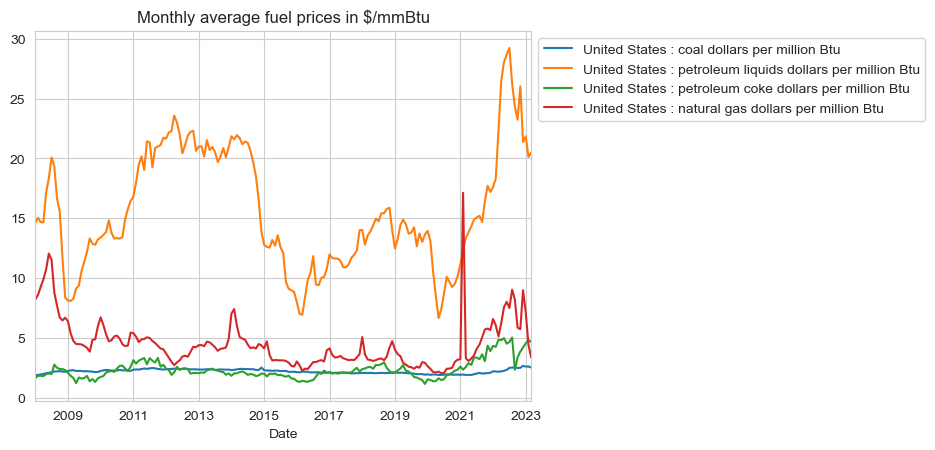

In [64]:
ax = fuels.plot()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Monthly average fuel prices in $/mmBtu")